In [36]:
import numpy as np
import pandas as pd
import networkx as nx
import bct as bct
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Prepare the network for analysis.

Load the withdrawal correlation matrix.

In [37]:
withdrawal_df = pd.read_csv('../../data/cFosCAN_alcohol_withdrawal_orig_20180326.csv')

Set the index to the region labels.

In [38]:
withdrawal_df = withdrawal_df.set_index('Unnamed: 0')

Sort regions alphabetically.

In [39]:
withdrawal_df = withdrawal_df.sort_index()
withdrawal_df = withdrawal_df.sort_index(axis=1)

In [40]:
withdrawal_mat = withdrawal_df.as_matrix()

Zero-out the diagonal and edges with r<0.75, then save the matrix for analysis in MATLAB.

In [41]:
np.fill_diagonal(withdrawal_mat, 0)

### Thresholded Matrix

In [42]:
withdrawal_95pctl = stats.scoreatpercentile(withdrawal_mat, 95)

In [43]:
withdrawal_95pctl_mask = (withdrawal_mat <= withdrawal_95pctl)

In [44]:
withdrawal_mat[withdrawal_95pctl_mask] = 0

Createa a data frame for the thresholded matrix.

In [45]:
withdrawal_95pctl_df = pd.DataFrame(withdrawal_mat)

Add column and index labels back in.

In [46]:
withdrawal_95pctl_df.columns = withdrawal_df.columns[:]

In [47]:
withdrawal_95pctl_df.index = withdrawal_df.index

Drop regions that have been disconnected during thresholding

In [48]:
disconnected_regions = (withdrawal_95pctl_df != 0).any(axis=0)

In [ ]:
withdrawal_95pctl_cc_df = withdrawal_95pctl_df.loc[disconnected_regions,disconnected_regions]

Save the connected component of the network as a matrix.

In [ ]:
np.savetxt('../../data/cFosCAN_alcohol_withdrawal_95pctl_CC_mat_20180423.csv', withdrawal_95pctl_cc_df.as_matrix(), delimiter=',')

### Prepare the manual partition.

Load the manual partition.

In [ ]:
manual_partition_df = pd.read_csv('../../data/ClusterBrainListForGraphTheory.csv')

Set the index to the region labels.

In [ ]:
manual_partition_df = manual_partition_df.set_index("Region")

Sort regions alphabetically.

In [ ]:
manual_partition_df = manual_partition_df.sort_index()

Get an array containing module assignments for nodes in the connected component.

In [ ]:
cc_partition = manual_partition_df.iloc[disconnected_regions.values,2].values

### Draw the connected (thresholded) graph.

Build a graph object.

In [ ]:
G = nx.from_numpy_matrix(withdrawal_95pctl_cc_df.as_matrix())

In [ ]:
node_strength = bct.degree.strengths_und(withdrawal_95pctl_cc_df.as_matrix())

In [ ]:
nx.draw_kamada_kawai(G, node_color=node_strength, node_size=150, cmap=plt.cm.viridis)

### Calculate and plot nodal metrics based on the manual partition.

Draw the graph with nodes colored by module.

In [ ]:
nx.draw_kamada_kawai(G, node_color=cc_partition, node_size=150, cmap=plt.cm.Paired)

Calculate nodal metrics and draw the graph with nodes colored by each metric.

In [ ]:
manual_pc = bct.centrality.participation_coef(withdrawal_95pctl_cc_df.as_matrix(), cc_partition)

In [ ]:
nx.draw_kamada_kawai(G, node_color=manual_pc, node_size=150, cmap=plt.cm.viridis)

In [ ]:
manual_wmdz = bct.centrality.module_degree_zscore(withdrawal_95pctl_cc_df.as_matrix(), cc_partition)

In [ ]:
nx.draw_kamada_kawai(G, node_color=manual_wmdz, node_size=150, cmap=plt.cm.viridis)

### Prepare the network for analysis.

Load the withdrawal correlation matrix.

In [3]:
withdrawal_df = pd.read_csv('../../data/cFosCAN_alcohol_withdrawal_orig_20180326.csv')

Set the index to the region labels.

In [4]:
withdrawal_df = withdrawal_df.set_index('Unnamed: 0')

Sort regions alphabetically.

In [5]:
withdrawal_df = withdrawal_df.sort_index()
withdrawal_df = withdrawal_df.sort_index(axis=1)

In [6]:
withdrawal_mat = withdrawal_df.as_matrix()

Zero-out the diagonal

In [7]:
np.fill_diagonal(withdrawal_mat, 0)

### Visualize the Louvain partition and nodal metrics.
These were calculated using the `run_louvain.m` Matlab script and gamma=1.0.

Plotting functions do not play nice with negative edges or dense graphs, so we remove those when laying out the plot.

In [15]:
withdrawal_mat_po = withdrawal_mat.copy()

In [16]:
withdrawal_mat_po[withdrawal_mat_po < 0.80] = 0

In [18]:
G_po = nx.from_numpy_matrix(withdrawal_mat_po)

In [11]:
reordered_matrix = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/withdrawal_nothresh/gamma1.0_ReorderedMatrix.txt')

In [12]:
reordered_matrix = reordered_matrix.reshape(withdrawal_mat.shape)

In [14]:
partition = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/withdrawal_nothresh/gamma1.0_GraphPartition.txt')

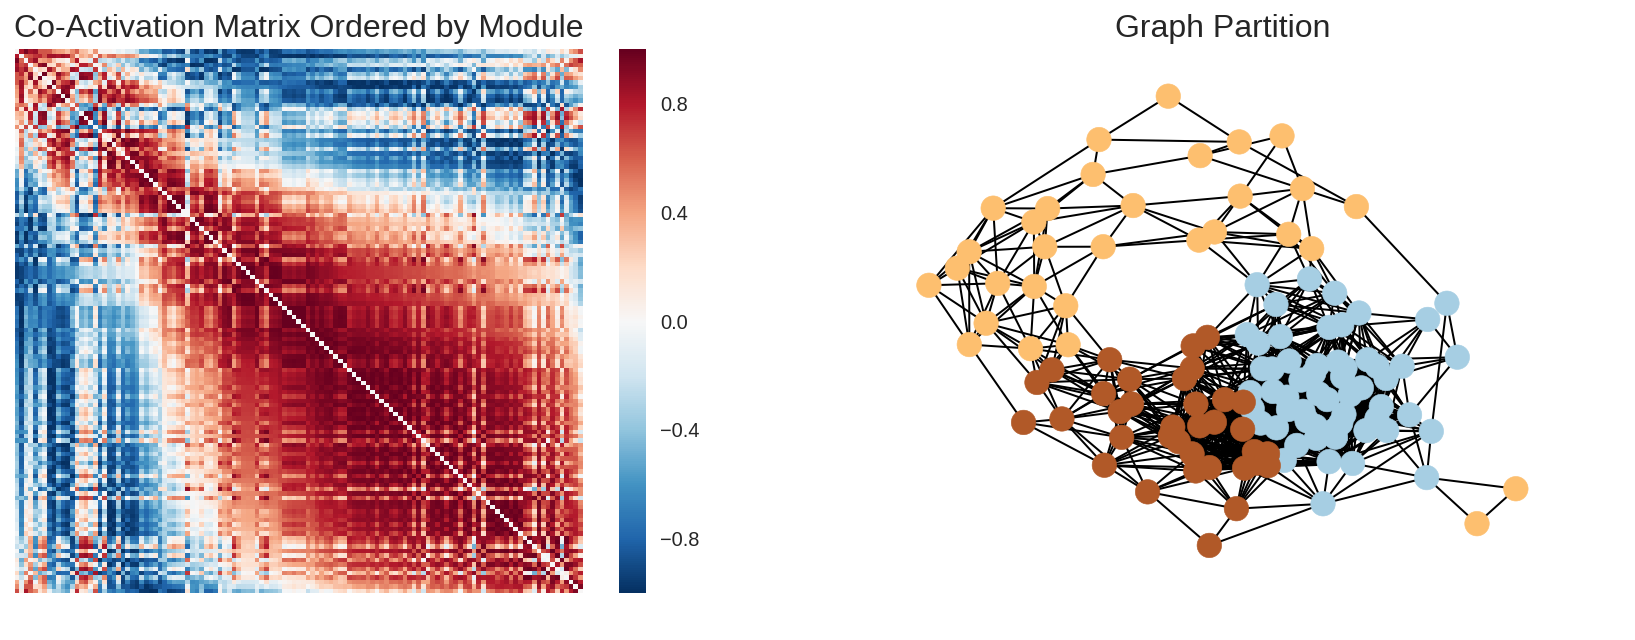

In [34]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
g = sns.heatmap(reordered_matrix, xticklabels=False, yticklabels=False, ax=ax[0], )
g = nx.draw_kamada_kawai(G_po, node_color=partition, node_size=150, cmap=plt.cm.Paired, ax=ax[1])
g = ax[0].set_title('Co-Activation Matrix Ordered by Module', fontsize=16)
g = ax[1].set_title('Graph Partition', fontsize=16)

Draw the graph with nodes colored by WMDz.

In [28]:
wmdz = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/withdrawal_nothresh/gamma1.0_WMDz.txt')

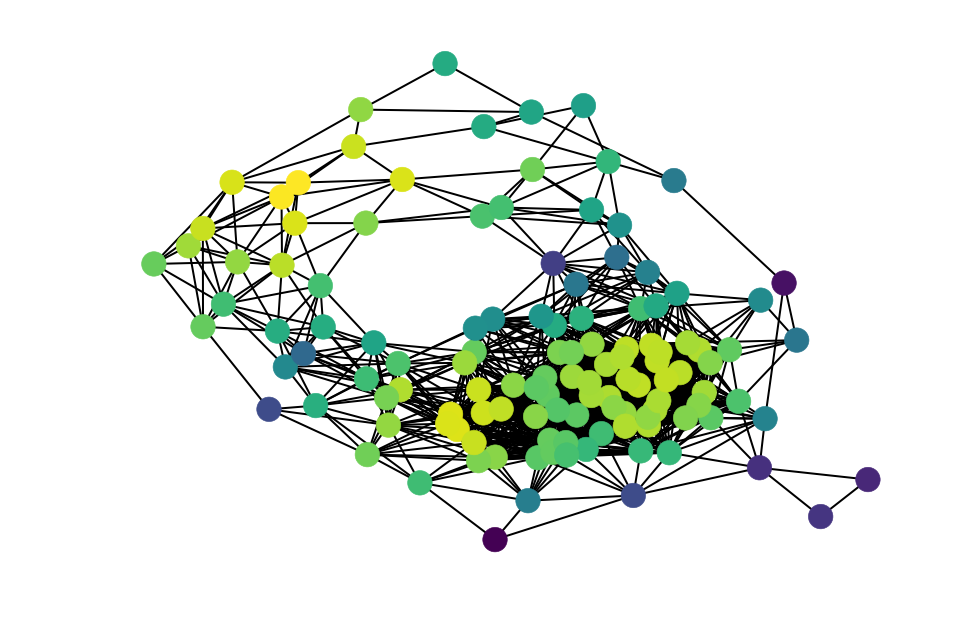

In [29]:
nx.draw_kamada_kawai(G_po, node_color=wmdz, node_size=150, cmap=plt.cm.viridis)

In [30]:
wb_node_strength = bct.degree.strengths_und_sign(withdrawal_mat)

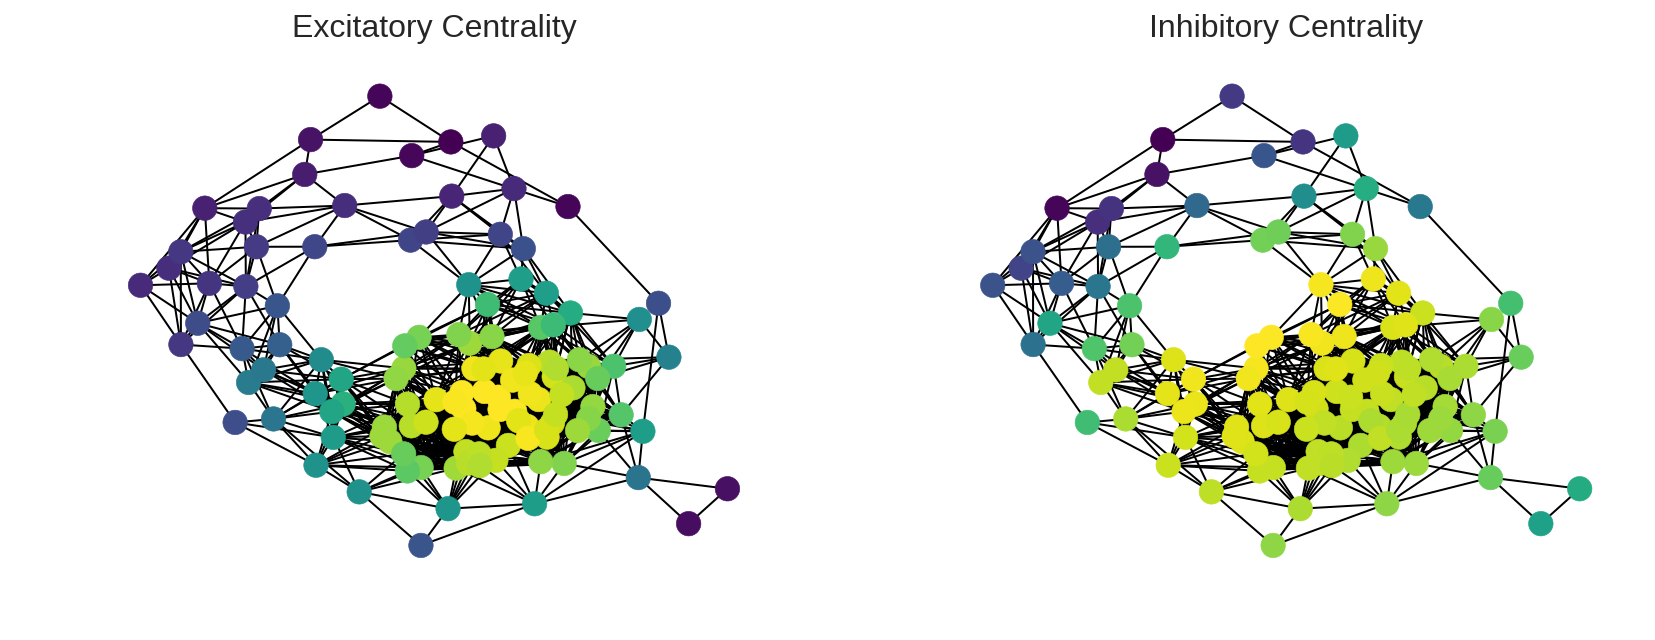

In [31]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
g = nx.draw_kamada_kawai(G_po, node_color=wb_node_strength[0], node_size=150, cmap=plt.cm.viridis, ax=ax[0])
g = nx.draw_kamada_kawai(G_po, node_color=wb_node_strength[1], node_size=150, cmap=plt.cm.viridis, ax=ax[1])
g = ax[0].set_title('Excitatory Centrality', fontsize=16)
g = ax[1].set_title('Inhibitory Centrality', fontsize=16)

Draw the graph with nodes colored by excitatory PC.

In [22]:
pc_pos = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/withdrawal_nothresh/gamma1.0_PC_pos.txt')

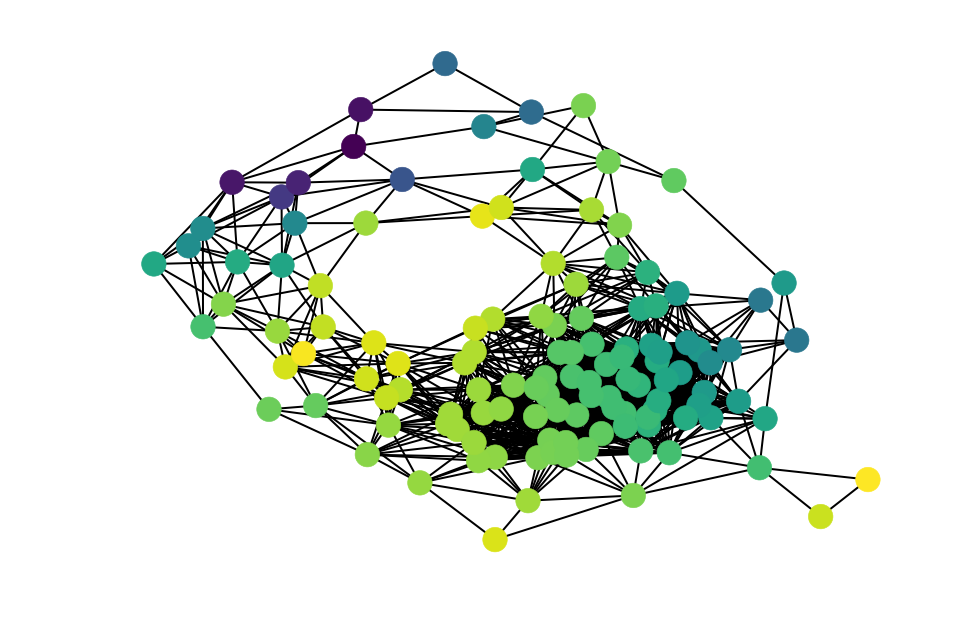

In [26]:
nx.draw_kamada_kawai(G_po, node_color=pc_pos, node_size=150, cmap=plt.cm.viridis)

Draw the graph with nodes colored by PC.

In [25]:
pc_neg = np.genfromtxt('/home/despoB/dlurie/Projects/withdrawal_CAN/results/withdrawal_nothresh/gamma1.0_PC_neg.txt')

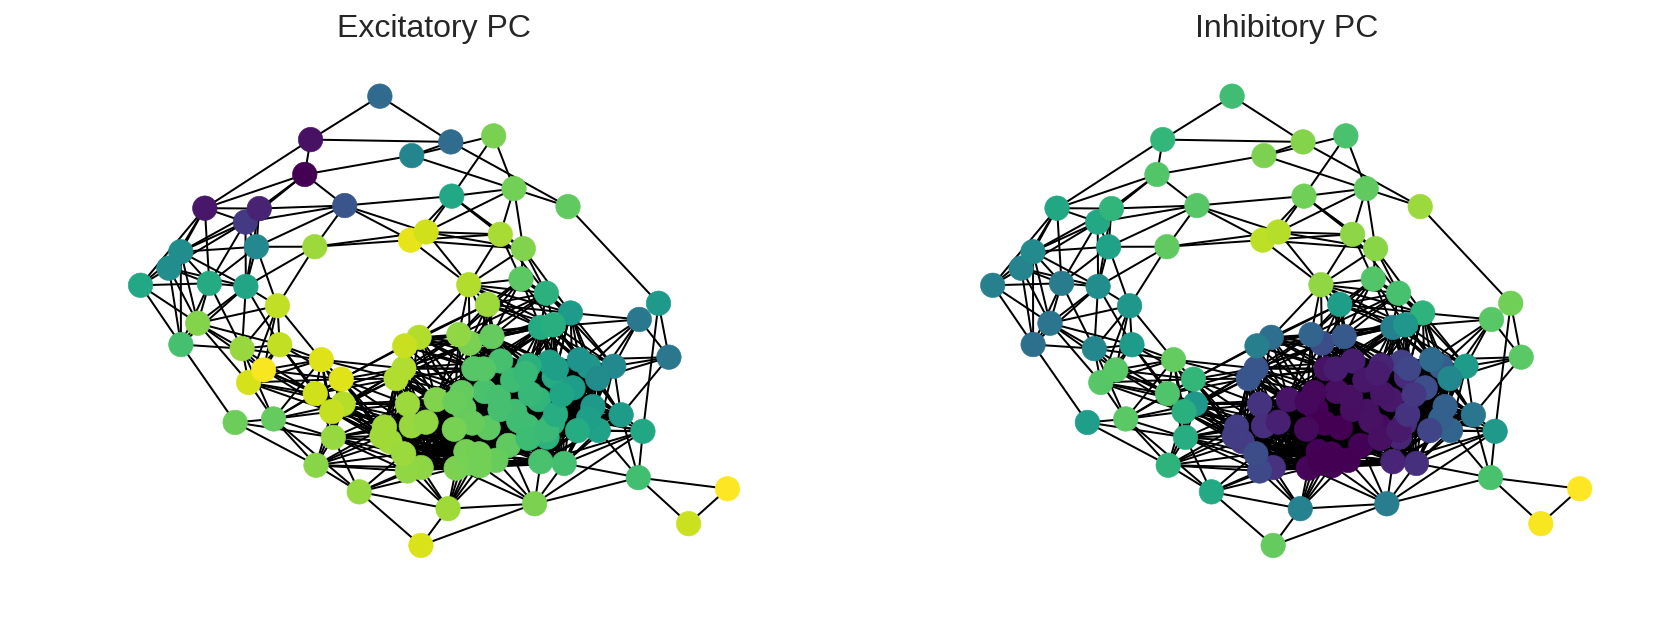

In [35]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
nx.draw_kamada_kawai(G_po, node_color=pc_pos, node_size=150, cmap=plt.cm.viridis, ax=ax[0])
nx.draw_kamada_kawai(G_po, node_color=pc_neg, node_size=150, cmap=plt.cm.viridis, ax=ax[1])
g = ax[0].set_title('Excitatory PC', fontsize=16)
g = ax[1].set_title('Inhibitory PC', fontsize=16)

Combine all our results into a single spreadsheet.

In [ ]:
combined_df = pd.DataFrame(np.array([node_strength, cc_partition, manual_pc, manual_wmdz, dd_partition, dd_pc, dd_wmdz]).T,
                           columns=['node_strength', 'manual_partition', 'manual_pc', 'manual_wmdz', 'dd_partition','dd_pc', 'dd_wmdz'])

In [ ]:
combined_df = combined_df.set_index(manual_partition_df.iloc[disconnected_regions.values,2].index)

Save the combined spreadsheet to disk.

In [ ]:
combined_df.to_csv('/home/despoB/dlurie/Projects/withdrawal_CAN/results/withdrawal_95pctl/20180423_combined_results.csv', sep=',')

In [2]:
#!/usr/bin/python3

# Copyright 2016-2017 Maxwell Shinn (maxwell.shinn@yale.edu)
# Available under the GNU GPLv3.

# If you use this code, please cite:

#     Shinn, M., Romero-Garcia, R., Seidlitz, J., Vasa, F., Vertes,
#     P., Bullmore, E. (2017). Versatility of nodal affiliation to
#     communities. Scientific Reports 7: 4273.
#     doi:10.1038/s41598-017-03394-5

# This script implements versatility (Shinn et al., 2017), which
# describes how closely affiliated a node is with a network community
# structure.

# Dependencies:

# - python 3
# - networkx
# - scipy/numpy/matplotlib
# - bctpy: The module "bct" is bctpy, a port of the Brain Connectivity
#   Toolbox to Python.  The latest version supports Python3.
#   https://github.com/aestrivex/bctpy or "pip install bcpty".  If you
#   don't want to install bctpy, it should be pretty easy to modify
#   this code to remove the dependency.

# Here is a quick example to get you started:
#
#     import networkx
#     from versatility import *
#     G = networkx.karate_club_graph()
#     find_nodal_mean_versatility(G, find_communities_louvain, processors=2)
#     find_nodal_versatility(G, find_communities_louvain, algargs={"gamma" : 0.5})

# You've probably noticed that there are a lot of assert statements.
# This code will run a bit faster if you run "python -O", which will
# skip the asserts.  I can't say I recommend this, but if you really
# want to do so then be my guest...

# # The following line may make this run in Python2, though your
# # results may vary.
# from __future__ import print_function, unicode_literals, absolute_import, division


import bct
import networkx
import matplotlib.pyplot as plt
import numpy
import scipy.stats

# ▌ ▌            ▐  ▗▜ ▗▐             ▐     ▗       
# ▚▗▘▞▀▖▙▀▖▞▀▘▝▀▖▜▀ ▄▐ ▄▜▀ ▌ ▌ ▛▚▀▖▞▀▖▜▀ ▙▀▖▄ ▞▀▖▞▀▘
# ▝▞ ▛▀ ▌  ▝▀▖▞▀▌▐ ▖▐▐ ▐▐ ▖▚▄▌ ▌▐ ▌▛▀ ▐ ▖▌  ▐ ▌ ▖▝▀▖
#  ▘ ▝▀▘▘  ▀▀ ▝▀▘ ▀ ▀▘▘▀▘▀ ▗▄▘ ▘▝ ▘▝▀▘ ▀ ▘  ▀▘▝▀ ▀▀ 

def find_nodal_versatility(g, alg, algname="", processors=1, algargs={}, it=200):
    """Computes the versatility of each node.

    This replaces find_nodal_uncertainty and
    find_nodal_uncertaintyplusplus as measures of how difficult it is
    to group a node into a module.  `g` should be a
    directed/undirected, weighted/unweighted graph, and `alg` should
    be a function compatible with the "alg" argument of the
    "consensus_matrix" function. The definition of nodal versatility
    is:

    $U_n = ∑_{i∈N} sin(π a_{n,i})/(∑_{i∈N} a_{n,i})$

    where $a_{i,j}$ is an element of the association matrix, i.e. each
    cell is the probability that algorithm `alg` will classify those
    nodes in the same module.  This assigns the property
    "[algname]vers" to each node, where "[algname]" is `algname`.  It
    also assigns the mean uncertainty in all nodes to the graph
    property "[algname]meanvers". This returns a dictionary of nodal
    versatility indexed by node.

    The optional `algargs` parameter is a dictionary that specifies
    what extra arguments should be passed to `alg`.  (This makes it so
    that you don't have to use partial functions for something as
    simple as a resolution parameter.)  For example, to specify the
    resolution parameter for the louvain algorithm to 1.5, set
    algargs={"gamma" : 1.5}.

    The `it` argument is the number of times to run the modularity
    algorithm when estimating the association matrix.  It should
    generally not be lower than 100, and there is little need to make
    it higher than 1000.  The default of 200 is a good tradeoff
    between precision and speed.

    The optional argument `processors` should be set to an integer
    greater than 0.  If it is greater than 1, consensus_matrix_par
    will be used instead of consensus_matrix.
    """
    assert type(g) == networkx.classes.graph.Graph, "Not a graph"
    assert type(processors) == int and processors > 0, "Invalid number of processors"
    # We don't check `alg`, `it`, or `algargs` because
    # consensus_matrix function does that for us, and we just pass it
    # directly to there unmodified.
    if processors == 1:
        C = consensus_matrix(g, alg, it=it, algargs=algargs)
    else:
        C = consensus_matrix_par(g, alg, it=it, processors=processors, algargs=algargs)
    g.graph['%sconsmatrix' % algname] = C.astype('float16')
    Cs = numpy.sin(numpy.pi*C)
    assert numpy.all(C == C.T) and numpy.all(Cs == Cs.T), "Assocation matrix or versatility matrix not symmetric"
    assert type(C) == numpy.ndarray and type(Cs) == numpy.ndarray, "Not ndarrays" # Not numpy.matrix 
    versatility = numpy.sum(Cs, axis=0)/numpy.sum(C, axis=0)
    versatility[versatility<1e-10] = 0 # Prevent really small values
    versatilitydict = dict(zip(g.nodes(), list(map(float, versatility))))
    networkx.set_node_attributes(g, versatilitydict, name="%svers" % algname)
    g.graph["%svers" % algname] = numpy.mean(versatility)
    return versatilitydict


_argvalsm = numpy.array(range(4, 25), dtype=float)/10
def find_nodal_mean_versatility(g, alg, algname="", processors=1, argname="gamma", argvals=_argvalsm, it=100):
    """Compute the mean versatility across parameters.

    Compute the mean versatility across a spectrum of different
    parameters (e.g. gamma in the louvain algorithm) and computes the
    mean for each node.  `g`, `alg`, `algname`, `processors`, and `it`
    are as documented in `find_nodal_versatility`.  `argname` is the
    argument which we are to vary.  `argvals` are the values across
    which the mean is to be taken.  This assigns the value
    "[algname]meanvers" to each node in `g` corresponding to the mean
    versatility across the spectrum of parameters.  It also returns
    these values as a dictionary indexed by node.  Furthermore, it
    computes the mean of these mean versatility values and assigns it
    as a graph property named "[algname]meanvers".
    """
    gc = g.copy()
    for v in argvals:
        find_nodal_versatility(gc, alg, algname=str(v), processors=processors, algargs={argname : v}, it=it)
        print(v)
    means = { n : numpy.mean([gc.node[n][str(v)+"vers"] for v in argvals]) for n in gc.nodes() }
    allvals = { n : dict(zip(argvals, [gc.node[n][str(v)+"vers"] for v in argvals])) for n in gc.nodes() }
    networkx.set_node_attributes(g, means, name= "%smeanvers" % algname)
    networkx.set_node_attributes(g, allvals, name="%smeanversvals" % algname)
    g.graph["%smeanvers" % algname] = numpy.mean(list(means.values()))
    return means

_argvalsc = numpy.asarray(list(range(0, 40)))/10+.1
def find_optimal_gamma_curve(G, alg, algarg="gamma", argvals=_argvalsc, it=100, show=True, **kwargs):
    """Plots the mean network versatility across a spectrum of resolution parameters.

    `g` should be a networkx network.  All other arguments are
    optional, and may be specified as in find_nodal_versatility.  The
    algorithm `alg` should also take an extra argument, specified by
    `argname`.  This should be a string describing an algorithm
    argument which can vary across a spectrum.  It will vary according
    to the argument `argvals`.  These arguments are similar to those
    in find_nodal_mean_versatility, but instead of taking the average,
    it will plot them.  This returns a list of the versatility values.
    """
    import scipy.stats
    import sys
    gs = argvals
    vs = []
    sems = []
    for g in gs:
        v = find_nodal_versatility(G, alg=alg, algargs={algarg : g}, it=it, **kwargs)
        vs.append(numpy.mean(list(v.values())))
        sems.append(scipy.stats.sem(list(v.values())))
        print(g, end=" ")
        sys.stdout.flush()
    print("\n")
    if show == True:
        plt.errorbar(gs, vs, yerr=sems)
        plt.title("Versatility across different values of %s" % algarg)
        plt.xlabel(algarg)
        plt.ylabel("Versatility")
        plt.show()
    return (gs,vs,sems)


# ▞▀▖                                  ▐  ▗          
# ▌  ▞▀▖▛▀▖▞▀▘▞▀▖▛▀▖▞▀▘▌ ▌▞▀▘ ▙▀▖▞▀▖▌ ▌▜▀ ▄ ▛▀▖▞▀▖▞▀▘
# ▌ ▖▌ ▌▌ ▌▝▀▖▛▀ ▌ ▌▝▀▖▌ ▌▝▀▖ ▌  ▌ ▌▌ ▌▐ ▖▐ ▌ ▌▛▀ ▝▀▖
# ▝▀ ▝▀ ▘ ▘▀▀ ▝▀▘▘ ▘▀▀ ▝▀▘▀▀  ▘  ▝▀ ▝▀▘ ▀ ▀▘▘ ▘▝▀▘▀▀ 


def consensus_matrix(g, algorithm, it=500, algargs={}):
    """Find the probability matrix of nodes i and j being in the same communitiy.

    `g` should be a networkx graph with N nodes.  `algorithm` should
    be a function that takes a networkx graph as its input and gives a
    dictionary as its output, where the index is the node and the
    value is an identifier representing the community.  This function
    runs `algorithm` `it` times (where `it` ∈ ℕ^+) and returns a NxN
    array, where the (i,j)-th cell is the probability that node i is
    in the same community as node j.  The rows and columns of the
    matrix are sorted by the list g.nodes().  Optionally, `algargs` is
    a list of arguments to pass to the modularity algorithm.
    """
    assert type(g) == networkx.classes.graph.Graph, "Not a graph"
    assert callable(algorithm), "f is not a function"
    assert type(it) == int, "Non-integer iterations"
    assert it > 0, "It needs to be greater than 0"
    consensus = numpy.zeros((len(g), len(g)))
    for i in range(0, it):
        p = algorithm(g, **algargs)
        assert type(p) == dict, "Wrong algorithm return type"
        assert len(p) == len(g), "Wrong algorithm return length"
        assert set(list(p.keys())) == set(g.nodes()), "Keys not nodes"
        consensus += numpy.array([[p[k] == p[j] for k in g.nodes()] for j in g.nodes()])
    consensus /= it
    return consensus

def consensus_matrix_par(g, algorithm, it=500, processors=2, algargs={}):
    """The consensus_matrix function parallelized.

    In addition to the arguments of `consensus_matrix`, this function
    has the extra argument `processors`, which is the number of
    processors on which to run the parallelization.
    """
    import multiprocessing, functools
    assert type(g) == networkx.classes.graph.Graph, "Not a graph"
    assert callable(algorithm), "f is not a function"
    assert type(it) == int, "Non-integer iterations"
    assert it > 0, "It needs to be greater than 0"
    assert type(processors) == int and processors > 0, "Invalid number of processors"
    # The idea here is that, since a consensus matrix is just a bunch
    # of matrices averaged together, we do "`it` divided by
    # `processors`" iterations on each processor and then average
    # together the results.  It sometimes does slightly more
    # iterations if it doesn't divide perfectly.
    # 
    # To do this, we make `processors` copies of the graph, and then
    # use a parallel pool map to send it to `processors` processors.
    itadj = int(numpy.ceil(it/processors))
    gs = [g for i in range(0, processors)] # This doesn't actually use any more memory since g is a reference
    # Use try-except catch-all to make sure we close the processes.
    # That way when we ctrl+c, we don't have 20 python processes
    # permanently running on our computer.
    try:
        p = multiprocessing.Pool(processors)
        cs = p.map(functools.partial(consensus_matrix, algorithm=algorithm, it=itadj, algargs=algargs), gs)
    finally:
        p.terminate()
    return numpy.mean(cs, axis=0)


# ▞▀▖                 ▗▐         ▜          ▗▐  ▌         
# ▌  ▞▀▖▛▚▀▖▛▚▀▖▌ ▌▛▀▖▄▜▀ ▌ ▌ ▝▀▖▐ ▞▀▌▞▀▖▙▀▖▄▜▀ ▛▀▖▛▚▀▖▞▀▘
# ▌ ▖▌ ▌▌▐ ▌▌▐ ▌▌ ▌▌ ▌▐▐ ▖▚▄▌ ▞▀▌▐ ▚▄▌▌ ▌▌  ▐▐ ▖▌ ▌▌▐ ▌▝▀▖
# ▝▀ ▝▀ ▘▝ ▘▘▝ ▘▝▀▘▘ ▘▀▘▀ ▗▄▘ ▝▀▘ ▘▗▄▘▝▀ ▘  ▀▘▀ ▘ ▘▘▝ ▘▀▀ 


def find_communities_louvain(g, gamma=1):
    """The louvain algorithm for community (module) structure.

    The input should be a graph in networkx graph format.  This
    function adds the "louvain" property to each of the nodes,
    describing which module (community) the node belongs to.  It
    returns a dictionary, where each index is a node and the value is
    the value is an integer representing the community index that node
    is a part of.
    """
    assert type(g) == networkx.classes.graph.Graph, "Not a graph"
    #assert networkx.is_connected(g), "Graph not connected"
    lmodule = bct.community_louvain(numpy.asarray(networkx.to_numpy_matrix(g)), gamma=gamma, B='negative_asym')
    c = dict(zip(g.nodes(), list(map(int, lmodule[0]))))
    networkx.set_node_attributes(g, c, name='louvain')
    return c

## Unthresholded, Signed, Whole-Brain Network

#### Use versatility to identify the optimal Louvain resolution parameter.

In [8]:
G = nx.from_numpy_matrix(withdrawal_mat)

In [9]:
find_communities_louvain(G, 2.3)

True
None
None
True


BCTParamError: Modularity infinite loop style G. Cost function did not converge after 10k iterations. Please contact the developer.

In [17]:
seed = None

In [18]:
RS = np.random.RandomState(seed)

In [19]:
RS.permutation([10,4,3])

array([10,  4,  3])

In [ ]:
g05_to_12 = find_optimal_gamma_curve(G, find_communities_louvain, argvals=np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]))

In [ ]:
g13_to_18 = find_optimal_gamma_curve(G, find_communities_louvain, argvals=np.array([1.3, 1.4, 1.5, 1.6, 1.7, 1.8]))

Run Louvain with a gamma of 1.5.

In [ ]:
wb_part = list(find_communities_louvain(G, gamma=1.5).values())

In [10]:
g = G
algorithm = find_communities_louvain
it = 200
algargs={'gamma':1.5}

In [11]:
import time
import sys
assert type(g) == networkx.classes.graph.Graph, "Not a graph"
assert callable(algorithm), "f is not a function"
assert type(it) == int, "Non-integer iterations"
assert it > 0, "It needs to be greater than 0"
consensus = numpy.zeros((len(g), len(g)))
for i in range(0, it):
    p = algorithm(g, **algargs)
    assert type(p) == dict, "Wrong algorithm return type"
    assert len(p) == len(g), "Wrong algorithm return length"
    assert set(list(p.keys())) == set(g.nodes()), "Keys not nodes"
    consensus += numpy.array([[p[k] == p[j] for k in g.nodes()] for j in g.nodes()])
    print(i)
    #time.sleep(1)
    sys.stdout.flush()
consensus /= it

True
None
None
True
0
True
None
None
True
1
True
None
None
True
2
True
None
None
True
3
True
None
None
True


BCTParamError: Modularity infinite loop style G. Cost function did not converge after 10k iterations. Please contact the developer.

In [ ]:
wb_consensus = consensus_matrix(G, find_communities_louvain, it=, algargs={'gamma':1.5})

In [ ]:
bct.consensus_und

### Plot network, community structure, and nodal metrics.

In [ ]:
nx.draw_kamada_kawai(G_po, node_color=wb_part, node_size=150, cmap=plt.cm.Paired)

### Plot node strengths

In [ ]:
wb_pc = bct.centrality.participation_coef_sign(withdrawal_mat, wd_part)

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(14,5))
g = nx.draw_kamada_kawai(G_po, node_color=wb_pc[0], node_size=150, cmap=plt.cm.viridis, ax=ax[0])
g = nx.draw_kamada_kawai(G_po, node_color=wb_pc[1], node_size=150, cmap=plt.cm.viridis, ax=ax[1])
g = ax[0].set_title('Excitatory PC', fontsize=16)
g = ax[1].set_title('Inhibitory PC', fontsize=16)

In [ ]:
nx.draw_kamada_kawai(G_po, node_color=pc[0], node_size=150, cmap=plt.cm.viridis)

In [ ]:
manual_wmdz = bct.centrality.module_degree_zscore(withdrawal_mat, wd_part)

In [ ]:
nx.draw_kamada_kawai(G_po, node_color=manual_wmdz, node_size=150, cmap=plt.cm.viridis)